In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import levene,shapiro
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import anova_lm

from scipy.stats import zscore
from factor_analyzer import FactorAnalyzer

import warnings
warnings.filterwarnings("ignore")

## Problem-1

In [4]:
sd=pd.read_csv('SalaryData.csv')

In [5]:
# Displaying top 5 rows of data frame
sd.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [6]:
# Displaying bottom 5 rows of data frame
sd.tail()

Education        Occupation  Salary
35   Bachelors   Exec-managerial  173935
36   Bachelors   Exec-managerial  212448
37   Bachelors   Exec-managerial  173664
38   Bachelors   Exec-managerial  212760
39   Doctorate   Exec-managerial  212781

In [7]:
# Check the shape of dataframe for no of rows and column
sd.shape

(40, 3)

In [8]:
# Check for sum of null values in each column
sd.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [9]:
# Check for information of dataframe ex.datatype,non null count of observation in each column,no of columns and rows.
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [10]:
# Check for statistical calculation for data frame for each column.
sd.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [11]:
# Check for object containing counts of unique values in descending order.
sd.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [12]:
#Grouping all the categoriesvariable education 
sd.groupby('Education')['Salary'].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Count'>

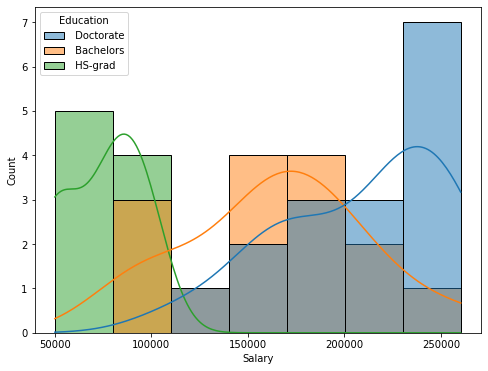

In [13]:
plt.subplots(figsize=(8,6))
sns.histplot(x='Salary', hue='Education', kde=True, data=sd)

In [14]:
sd.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [15]:
sd.groupby('Occupation')['Salary'].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Count'>

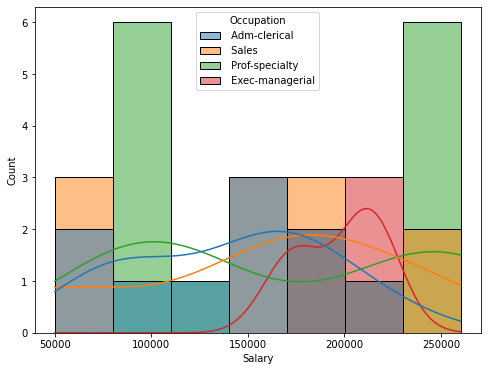

In [16]:
plt.subplots(figsize=(8,6))
sns.histplot(x='Salary', hue='Occupation', kde=True, data=sd)

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

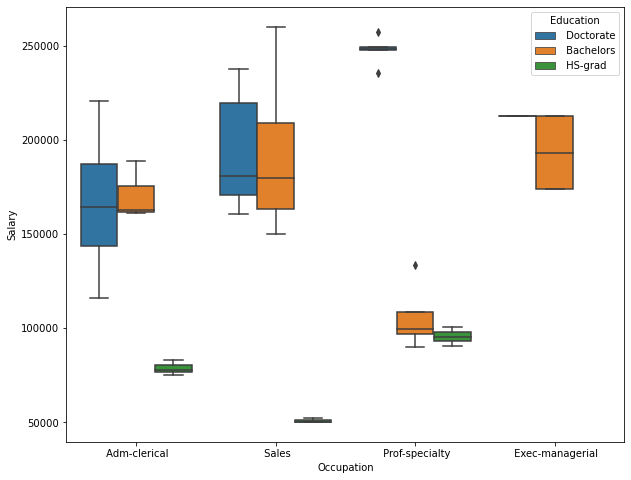

In [17]:
plt.subplots(figsize=(10,8))
sns.boxplot(x='Occupation', y='Salary', hue='Education', data=sd)

In [18]:
CT=pd.crosstab(sd['Occupation'],sd['Education'],values=sd['Salary'], aggfunc='mean' )
CT

Education          Bachelors      Doctorate       HS-grad
Occupation                                               
 Adm-clerical      170711.00  166457.750000  78759.666667
 Exec-managerial   193201.75  212781.000000           NaN
 Prof-specialty    105787.75  247772.833333  95534.333333
 Sales             192300.75  193916.600000  50822.333333

The Hypothesis for the One Way ANOVA are:

𝐻0: 𝐴𝑙𝑙 𝑡ℎ𝑒 salary 𝑚𝑒𝑎𝑛𝑠 as per educational levels 𝑎𝑟𝑒 𝑒𝑞𝑢𝑎𝑙.
𝐻𝑎:  𝐴𝑡 𝑙𝑒𝑎𝑠𝑡 𝑜𝑛𝑒 𝑜𝑓 𝑡ℎ𝑒 salary 𝑚𝑒𝑎𝑛𝑠 per educational levels 𝑎𝑟𝑒 𝑢𝑛𝑒𝑞𝑢𝑎𝑙.

In [ ]:
from statsmodels.formula.api import ols      # ols is technique used to build regression models
from statsmodels.stats.anova import anova_lm # to retrieve ANOVA table

### 1.2	Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results

One Way ANOVA with Education

In [19]:
formula = 'Salary ~ C(Education)'
model = ols(formula, sd).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


We see that the p-value is less than alpha (0.05). Thus, we  𝐑𝐞𝐣𝐞𝐜𝐭  the  𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬  ( 𝐻0 ). This means at least one particular category in the 'Education' variable has different mean of salary as compared to the other categories.

### 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [ ]:
One Way ANOVA with Occupation

In [20]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, sd).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


We see that the p-value is more than alpha (0.05). Thus, we  fail to 𝐑𝐞𝐣𝐞𝐜𝐭  the  𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬  ( 𝐻0 ). This means all category in the 'Occupation' variable has significant same mean of salary as compared to the other categories.

 checking if there is any interaction effect between the two variables on mean salary .

### 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

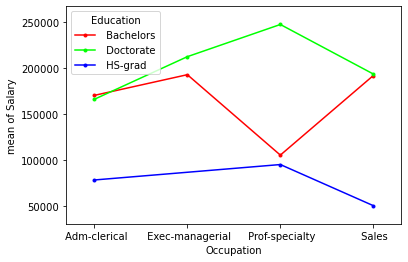

In [21]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(sd['Occupation'],sd['Education'],sd['Salary']);

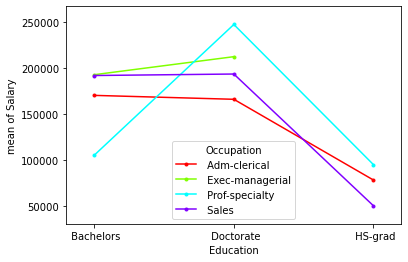

In [22]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(sd['Education'],sd['Occupation'],sd['Salary']);

**Still, we can see that there is some sort of interaction between the two variables. So, we will introduce a new term while performing the Two Way ANOVA.**

### 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

Two Way ANOVA without interaction

Let us now perform the Two Way ANOVA. We will now analyse the effect of both the variables on the 'Salary' variable.

In [23]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
#formula = 'Days ~ C(Weight_Gain) * C(Duration)'
model = ols(formula, sd).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

We see that the p-value is less than alpha (0.05)for combined effect for both the variable(Education and Occupation). Thus, we  𝐑𝐞𝐣𝐞𝐜𝐭  the  𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬  ( 𝐻0 ). There is an interaction effect between Education and Occupation type on average salary.

### 1.7 Explain the business implications of performing ANOVA for this particular case study

In [24]:
#Significant interaction effect
#Honest significant difference (tukeyhsd)
sd1=sd.copy()
sd1['Occupation_Education'] = sd1['Occupation']+':'+ sd1['Education']

In [25]:
sd1.head()

Education     Occupation  Salary      Occupation_Education
0   Doctorate   Adm-clerical  153197   Adm-clerical: Doctorate
1   Doctorate   Adm-clerical  115945   Adm-clerical: Doctorate
2   Doctorate   Adm-clerical  175935   Adm-clerical: Doctorate
3   Doctorate   Adm-clerical  220754   Adm-clerical: Doctorate
4   Doctorate          Sales  170769          Sales: Doctorate

In [26]:
sd1.Occupation_Education.value_counts()

 Prof-specialty: Doctorate     6
 Sales: Doctorate              5
 Adm-clerical: Doctorate       4
 Prof-specialty: Bachelors     4
 Sales: Bachelors              4
 Exec-managerial: Bachelors    4
 Adm-clerical: Bachelors       3
 Sales: HS-grad                3
 Adm-clerical: HS-grad         3
 Prof-specialty: HS-grad       3
 Exec-managerial: Doctorate    1
Name: Occupation_Education, dtype: int64

In [28]:
from statsmodels.stats.multicomp import MultiComparison

In [29]:
mcomp = MultiComparison(sd1['Salary'], sd1['Occupation_Education'])
print(mcomp.tukeyhsd().summary())

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
           group1                      group2             meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------------------------------------------------
    Adm-clerical: Bachelors     Adm-clerical: Doctorate     -4253.25    0.9  -75249.5887   66743.0887  False
    Adm-clerical: Bachelors       Adm-clerical: HS-grad  -91951.3333 0.0083  -167849.612  -16053.0547   True
    Adm-clerical: Bachelors  Exec-managerial: Bachelors     22490.75    0.9  -48505.5887   93487.0887  False
    Adm-clerical: Bachelors  Exec-managerial: Doctorate      42070.0    0.9   -65266.375   149406.375  False
    Adm-clerical: Bachelors   Prof-specialty: Bachelors    -64923.25 0.0963 -135919.5887    6073.0887  False
    Adm-clerical: Bachelors   Prof-specialty: Doctorate   77061.8333 0.0118   11331.9959  142791.6707   True
    Adm-clerical: B

## Problem 2

In [3]:
df_edu=pd.read_csv('Education+-+Post+12th+Standard.csv')

In [31]:
df=pd.read_excel('Data Dictionary.xlsx')

### 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head and tail of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [32]:
df_edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [33]:
df_edu.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [34]:
df

1)      Names: Names of various university and colleges
0       2)      Apps: Number of applications received     
1     3)      Accept: Number of applications accepted     
2     4)      Enroll: Number of new students enrolled     
3   5)      Top10perc: Percentage of new students ...     
4   6)      Top25perc: Percentage of new students ...     
5   7)      F.Undergrad: Number of full-time under...     
6   8)      P.Undergrad: Number of part-time under...     
7   9)      Outstate: Number of students for whom ...     
8            10)   Room.Board: Cost of Room and board     
9     11)   Books: Estimated book costs for a student     
10  12)   Personal: Estimated personal spending fo...     
11    13)   PhD: Percentage of faculties with Ph.D.’s     
12  14)   Terminal: Percentage of faculties with t...     
13             15)   S.F.Ratio: Student/faculty ratio     
14  16)   perc.alumni: Percentage of alumni who do...     
15  17)   Expend: The Instructional expenditure pe...     
16                   18)   Grad.Rate: Graduation rate

In [35]:
df_edu.shape

(777, 18)

In [36]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [37]:
# Describing the numerical variables of the dataframe
df_edu.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [38]:
# Describing the categorical variables of the dataframe
df_edu.describe(include=[object]).T

count unique                           top freq
Names   777    777  Abilene Christian University    1

In [39]:
# Check for missing value in any column
df_edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [40]:
# Check for duplicate data
df_edu.duplicated().sum()

0

# Univariate Analysis

In [41]:
df_edu.Names.value_counts()

Abilene Christian University        1
Southern Methodist University       1
Sarah Lawrence College              1
Savannah Coll. of Art and Design    1
Schreiner College                   1
                                   ..
Huntingdon College                  1
Huntington College                  1
Huron University                    1
Husson College                      1
York College of Pennsylvania        1
Name: Names, Length: 777, dtype: int64

<AxesSubplot:xlabel='Enroll'>

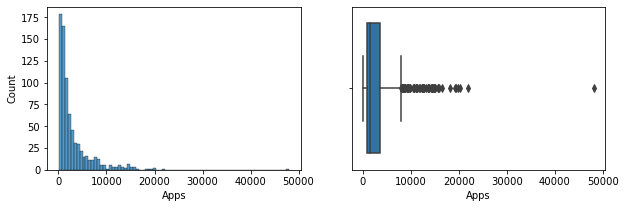

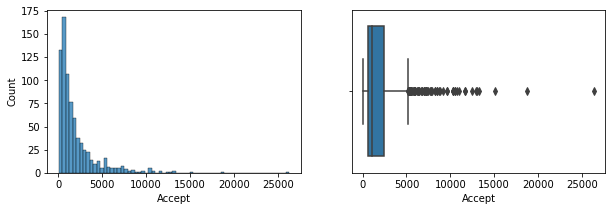

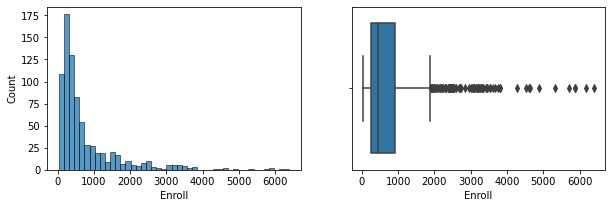

In [42]:
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.histplot(x='Apps', data=df_edu, ax=axes[0])
sns.boxplot(x='Apps', data=df_edu, ax=axes[1])
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.histplot(x='Accept', data=df_edu, ax=axes[0])
sns.boxplot(x='Accept', data=df_edu, ax=axes[1])
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.histplot(x='Enroll', data=df_edu, ax=axes[0])
sns.boxplot(x='Enroll', data=df_edu, ax=axes[1])

<AxesSubplot:xlabel='Top25perc'>

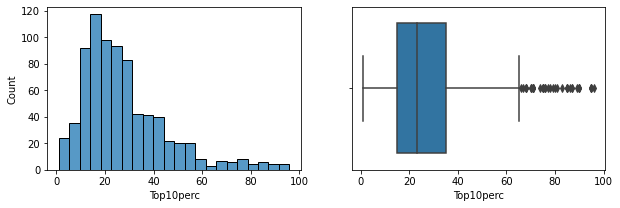

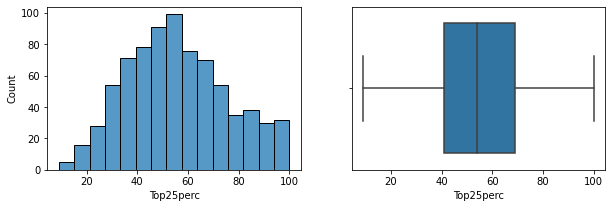

In [43]:
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.histplot(x='Top10perc', data=df_edu, ax=axes[0])
sns.boxplot(x='Top10perc', data=df_edu, ax=axes[1])
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.histplot(x='Top25perc', data=df_edu, ax=axes[0])
sns.boxplot(x='Top25perc', data=df_edu, ax=axes[1])

<AxesSubplot:xlabel='P.Undergrad'>

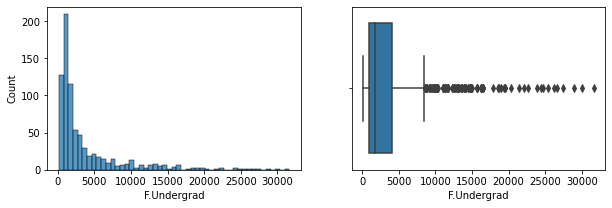

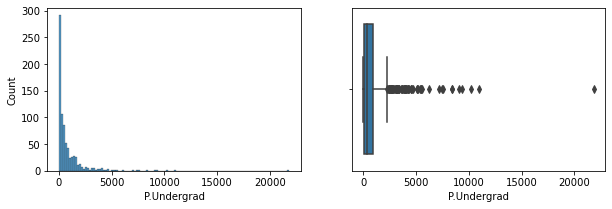

In [44]:
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.histplot(x='F.Undergrad', data=df_edu, ax=axes[0])
sns.boxplot(x='F.Undergrad', data=df_edu, ax=axes[1])
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.histplot(x='P.Undergrad', data=df_edu, ax=axes[0])
sns.boxplot(x='P.Undergrad', data=df_edu, ax=axes[1])

In [6]:
lstnumcols = list(df_edu.select_dtypes(exclude='object').columns)
lstnumcols

['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

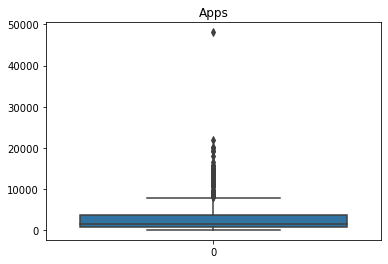

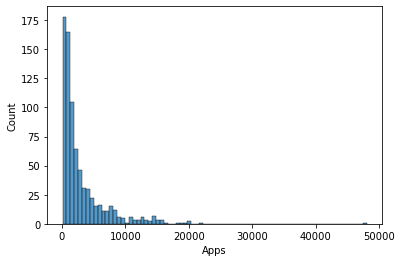

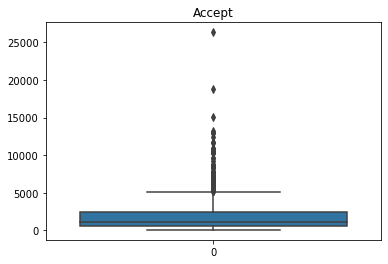

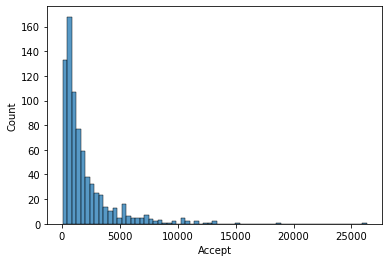

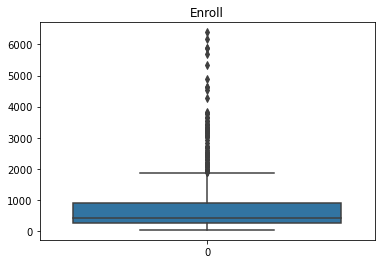

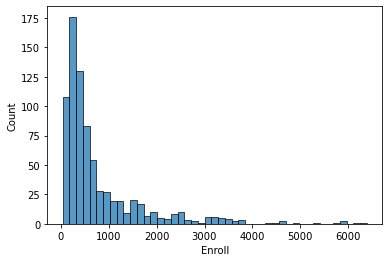

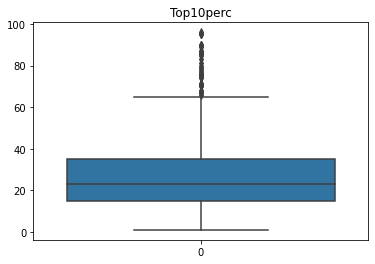

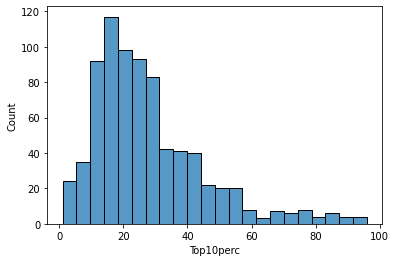

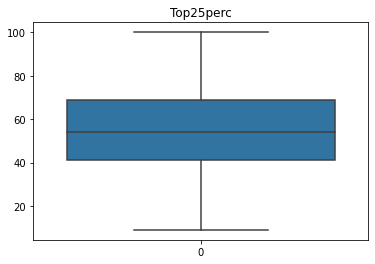

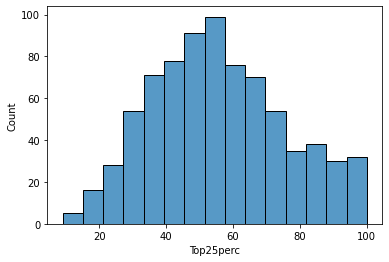

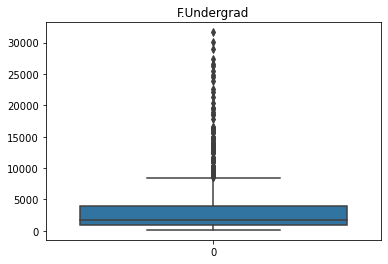

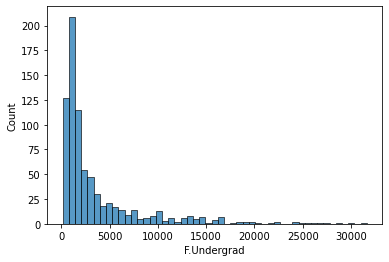

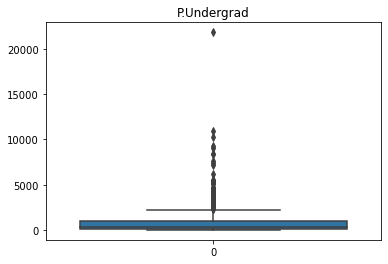

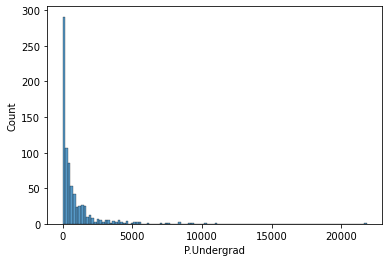

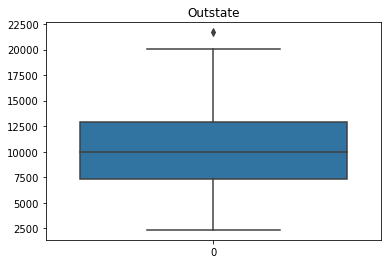

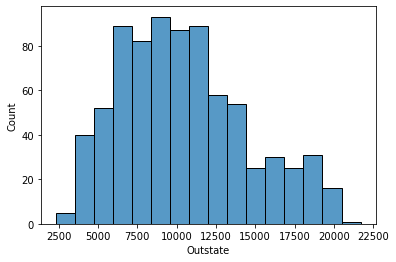

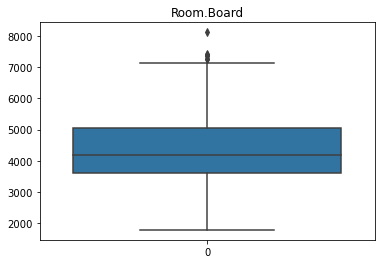

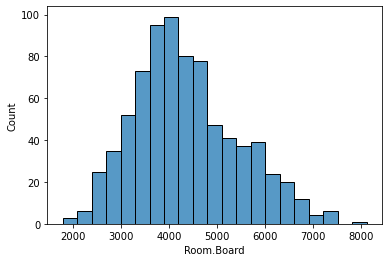

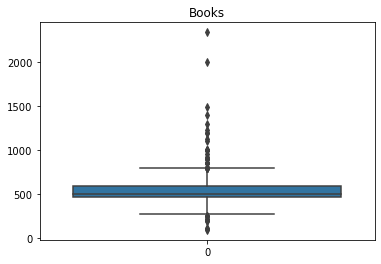

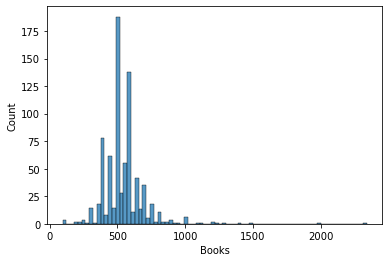

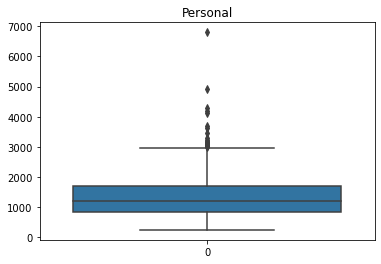

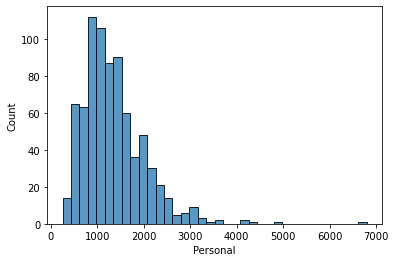

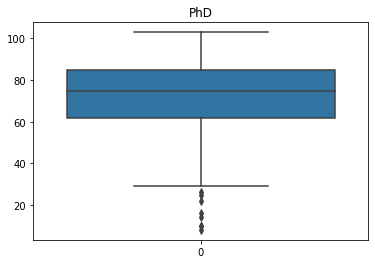

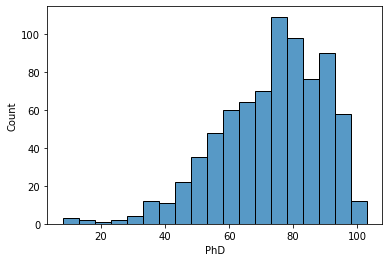

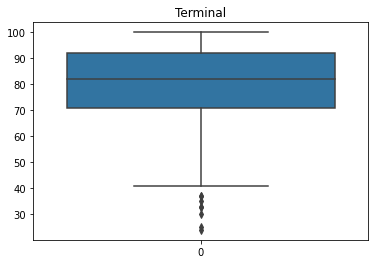

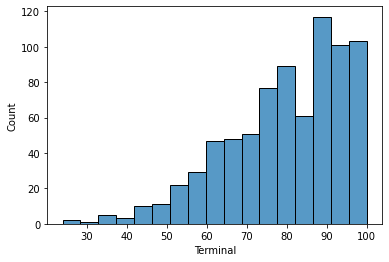

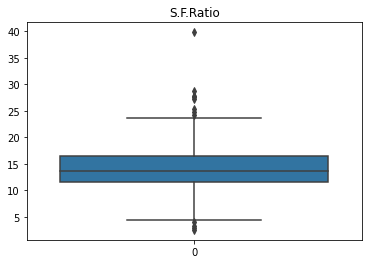

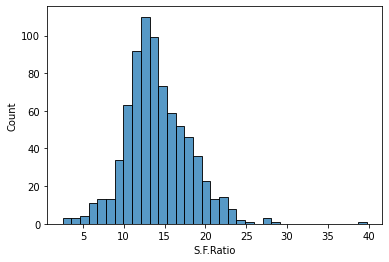

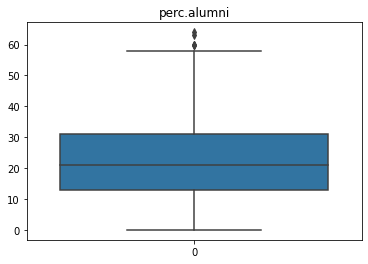

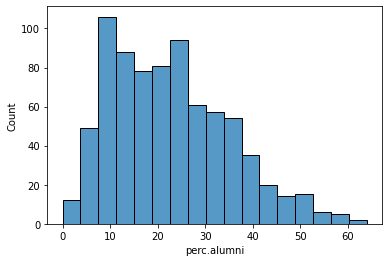

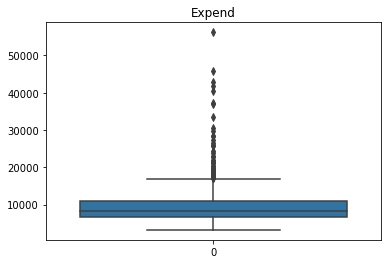

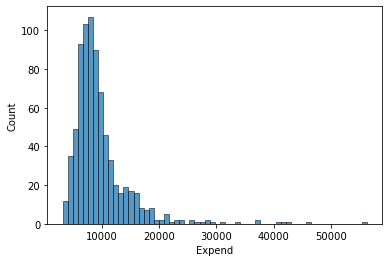

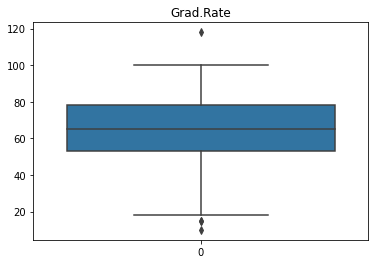

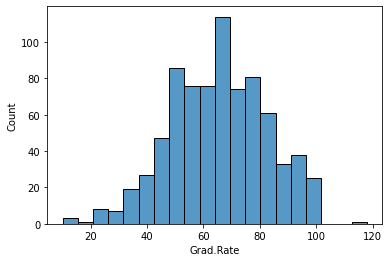

In [46]:
for i in df_edu[lstnumcols].columns:
    plt.title(i)
    sns.boxplot(data=df_edu[i])
    plt.show()
    sns.histplot(data=df_edu[i])
    plt.show()

# Bivariate Analysis

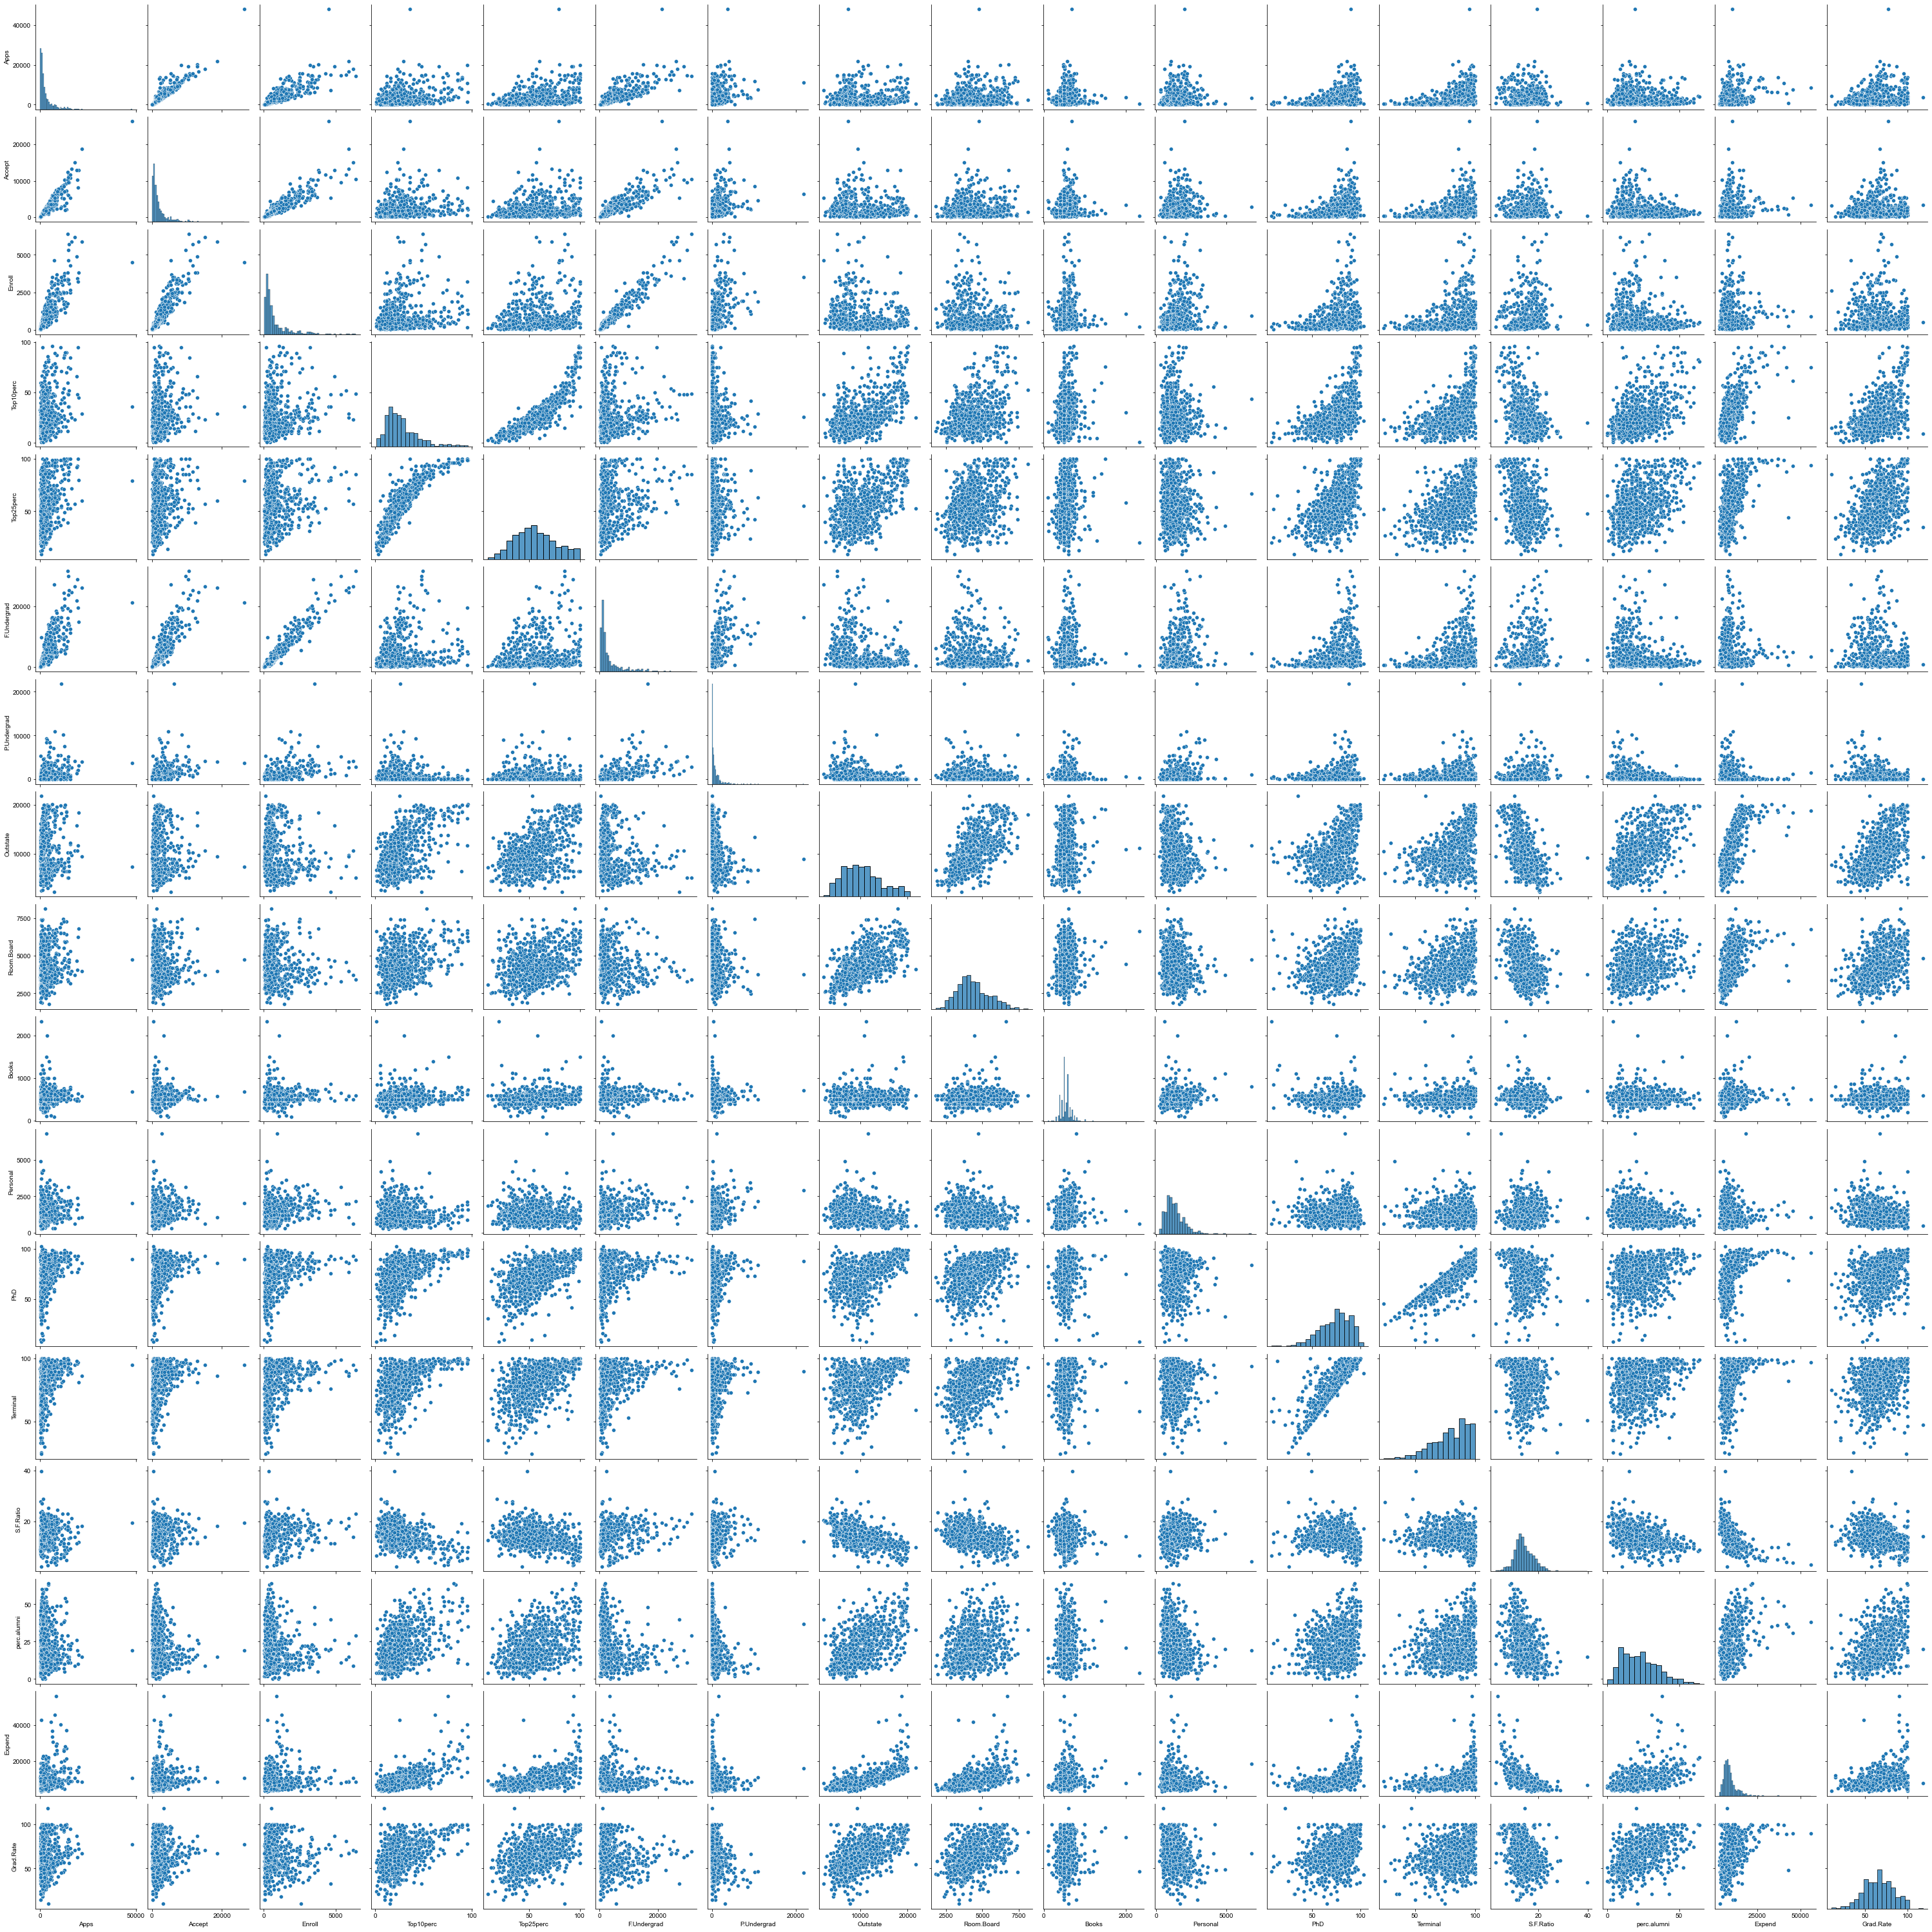

In [47]:
#Pairplot of all variables
sns.pairplot(data = df_edu,);
sns.set(font_scale=2)

## Multivariate Analysis

In [ ]:
g = sns.FacetGrid(df_edu, col="Apps", hue='Enroll', col_wrap=3)
g.map_dataframe(sns.scatterplot, x="F.Undergrad", y="P.Undergrad")
g.add_legend()


### 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling

In [7]:
# Covariance matrix of scaled data
# applying Zscore for all the numerical variables
cov_scaled = df_edu[lstnumcols].apply(zscore).cov()
cov_scaled

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

### 2.3 Comment on the comparison between the covariance and the correlation matrices from this data. [on scaled data]

In [8]:
# Covariance matrix of all the numerical columns
cov = df_edu[lstnumcols].cov()
cov

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

In [8]:
# Correlation matrix
corr = df_edu[lstnumcols].corr()
corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [9]:
# Correlation matrix
corr_scaled = df_edu[lstnumcols].apply(zscore).corr()
corr_scaled

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

##Covariance matrix of scaled data is same are the correlation matrix

<AxesSubplot:>

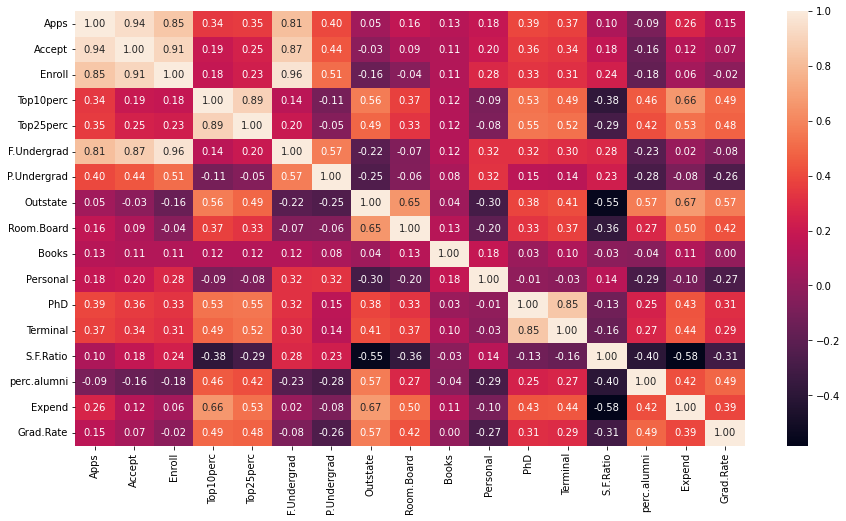

In [10]:
plt.subplots(figsize=(15,8))
sns.heatmap(corr, annot=True,fmt='.2f')



From the above heatmap we observe that most of the features related to no of application ,accepted application and no of enrollment of students are highly correlated to each other and few features related to top 10 and top 20 percentile  are correlated to each other.

### 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

<AxesSubplot:>

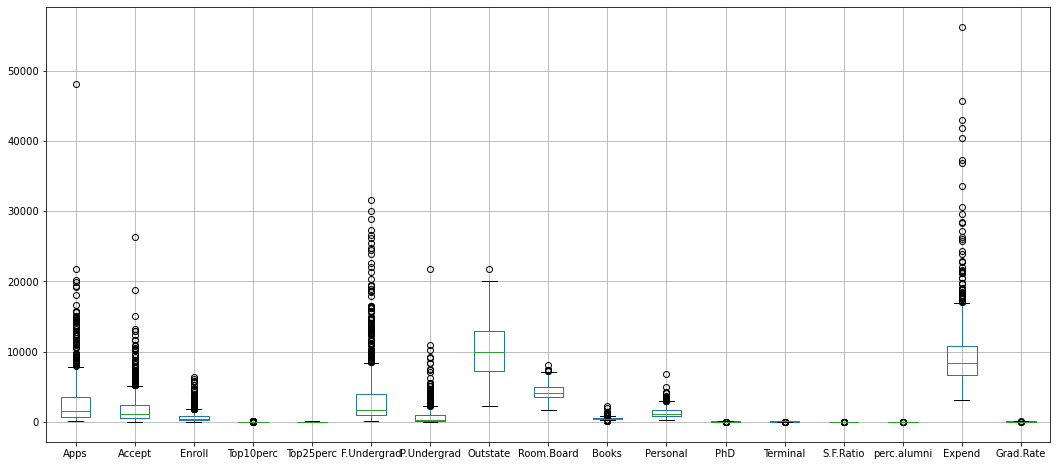

In [11]:
plt.subplots(figsize=(18,8))
df_edu.boxplot()

### Data preparation for PCA

In [10]:
df_edu1=df_edu.copy()
#Preparing a new dataframe with only numerical columns and droping categorical column
df_edu1.drop(['Names'],axis=True,inplace=True)

In [11]:
#Checking the shape of dataframe
df_edu1.shape

(777, 17)

In [12]:
#PCA is affected by scale, so need to scale the features in dataframe before applying PCA
#Applying zscore to scale the data frame 
df_edu1_scaled=df_edu1.apply(zscore)
df_edu1_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [15]:
# Checking the statistical calculations for the scaled data
df_edu1_scaled.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

<AxesSubplot:>

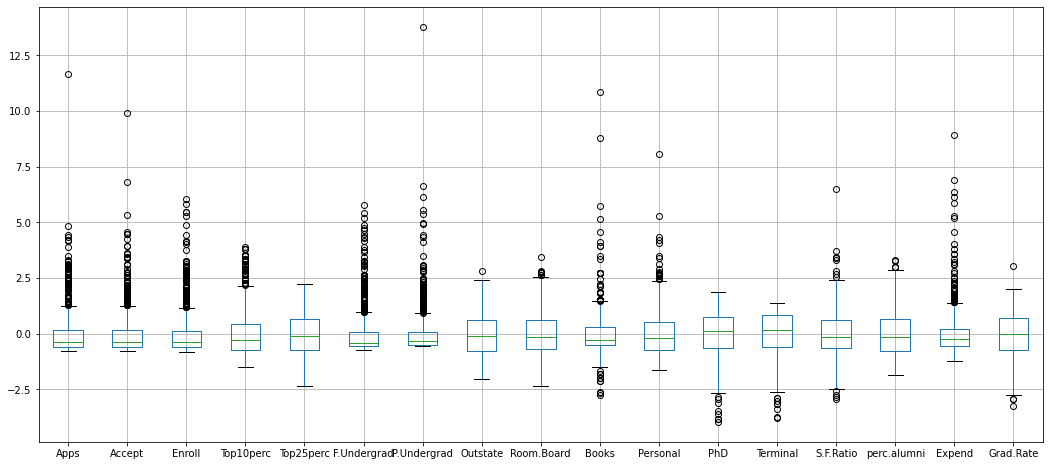

In [16]:
#2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?
plt.subplots(figsize=(18,8))
df_edu1_scaled.boxplot()

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_edu1_scaled)
chi_square_value,p_value

(11836.962561421826, 0.0)

KMO Test
The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components

In [18]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_edu1_scaled)
kmo_model

0.8131251200373523

In [19]:
df_edu1_scaled.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [20]:
kmo_all

array([0.76987176, 0.74004745, 0.78180611, 0.75497456, 0.79091631,
       0.81409846, 0.9109631 , 0.84989446, 0.86258897, 0.65829417,
       0.89150515, 0.79345989, 0.78805389, 0.89748336, 0.91140023,
       0.85432115, 0.91779383])

#### As per KMO test MSA for all the variable are more than 0.7 so we can perform PCA and expect a  reduction is the dimension and extraction of meaningful components 

## PCA 
####1st lets build all the components. As we have 17 features , 17 components can be built. All 17 components together will explain 100% of variance in data

In [21]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(df_edu1_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

### 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [26]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
 

### 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(df_edu1_scaled)
df_pca

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
         1.75239502e-03, -9.31400698e-02,  9.35522023e-02],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         1.03709803e-01, -5.02556890e-02, -1.74057054e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -2.25582869e-02, -4.05268301e-03,  3.75875882e-03],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
         6.79013123e-02, -2.32023970e-01, -9.99380421e-02],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
         3.53597440e-01,  3.04416200e-01,  3.35104811e-01],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
        -1.14873492e-01, -1.17076127e-01, -2.57218339e-03]])

### 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [23]:
# First row of original scaled data
df_edu1_scaled.head(1)  

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   

   S.F.Ratio  perc.alumni   Expend  Grad.Rate  
0   1.013776    -0.867574 -0.50191  -0.318252

In [33]:
# Loading or weights of each feature corresponding to eigen vector/component 
components = pca.components_
components

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [34]:
# Loadings for eigen vector/component 0 (PC0)
components[0] 

array([ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
        0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
       -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
        0.31890875,  0.25231565])

In [ ]:
# PC0 - New value (PC0 Score for 1st row)
(0.25*-0.346882) + (0.21*-0.321205) + (0.18*-0.063509) + (0.35 *-0.258583) + (0.34*-0.191827) + (0.15*-0.168116) + (0.03*-0.209207) + (0.29*-0.746356)+(0.25*-0.964905)+(0.06*-0.602312)+(-0.04*1.270045)+(0.32*-0.163028)+(0.32*-0.115729)+(-0.18*1.013776)+(0.21*-0.867574)+(0.32*-0.50191)+(0.25*-0.318252)

In [16]:
# Percentage of variance explained by each of the selected components
pca.explained_variance_ratio_ 

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

### 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [17]:
var_exp = pca.explained_variance_ratio_

In [18]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [0.32020628 0.58360843 0.65261759 0.71184748 0.76673154 0.81657854
 0.85216726 0.88670347 0.91787581 0.94162773 0.96004199 0.9730024
 0.98285994 0.99131837 0.99648962 0.99864716 1.        ]


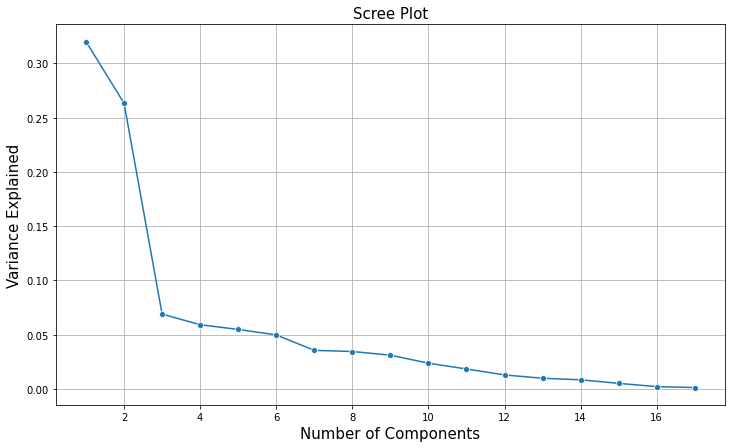

In [19]:
# View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

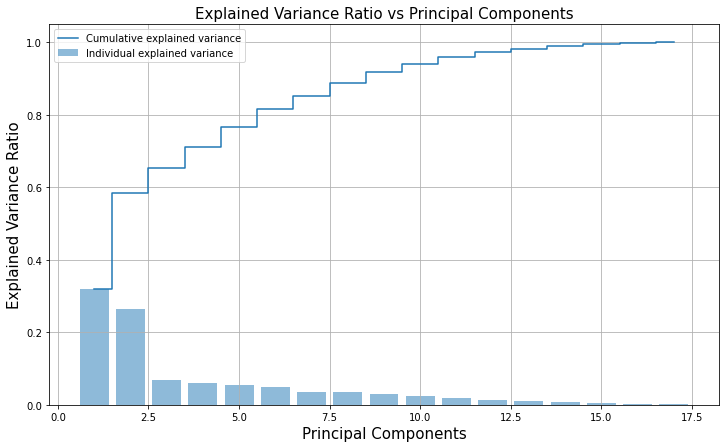

In [20]:
plt.figure(figsize=(12 ,7))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

### From scree plot and plot above, we see that we can retain only 6 components instead of 17 components as beyond 6 components the amount of variance explained in minimal and the first 6 components are able to explain 81.6% variance in data

### 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [37]:
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_edu1_scaled)
df_pca

array([[-1.59285540e+00,  7.67333510e-01, -1.01073616e-01,
        -9.21749291e-01, -7.43975435e-01, -2.98306092e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879810e+00,
         3.58891825e+00,  1.05999660e+00, -1.77137311e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092815e-01,
         6.77240533e-01, -3.69613276e-01, -9.60591689e-01],
       ...,
       [-7.32560596e-01, -7.72352401e-02, -4.05798710e-04,
         5.43164956e-02, -5.16021192e-01,  4.68014225e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356387e+00,
         8.52053749e-01, -9.47754660e-01, -2.06993735e+00],
       [-4.69508066e-01,  3.66660943e-01, -1.32891523e+00,
        -1.08022442e-01, -1.13217598e+00,  8.39893075e-01]])

In [38]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309209, -0.10124907, -0.08298558,  0.03505553, -0.02414794,
        -0.06139296,  0.13968171,  0.04659888,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182679, -0.05154725, -0.10976654,
         0.10041231, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

In [39]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_edu1_scaled))
df_pca_loading.shape

(6, 17)

In [40]:
df_pca_loading

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163

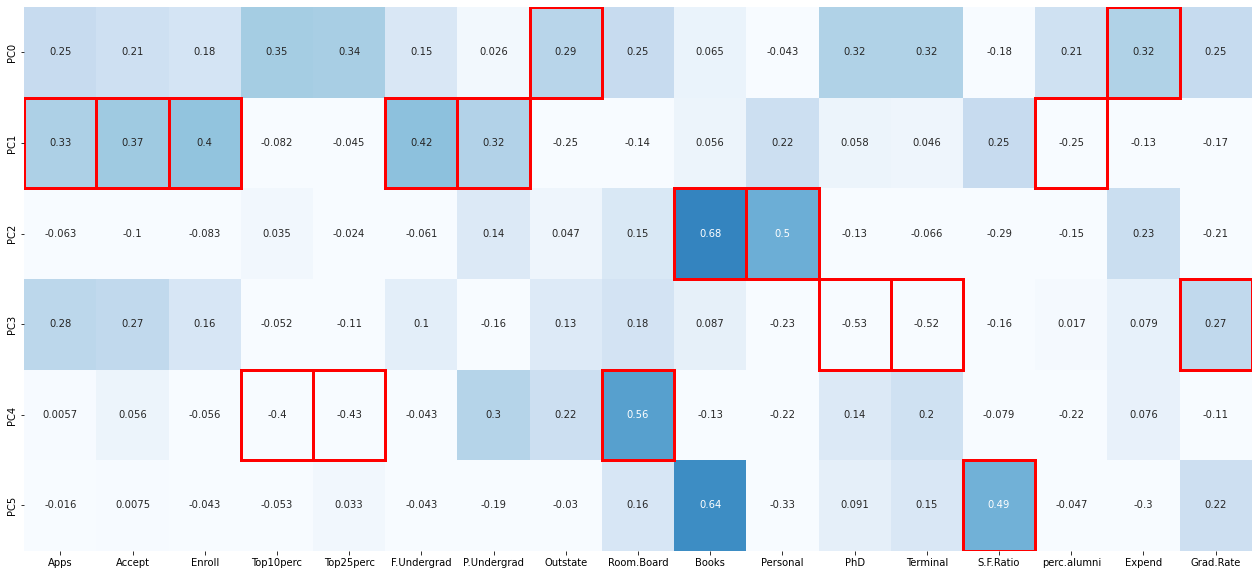

In [41]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [42]:
df_pca = pd.DataFrame(df_pca, columns=['PC0','PC1','PC2','PC3','PC4','PC5'])
df_pca.head()

PC0       PC1       PC2       PC3       PC4       PC5
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918

In [43]:
df_pca.shape

(777, 6)

In [44]:
df_new = pd.concat([df_edu['Names'], df_pca], axis=1)
df_new.head()

Names       PC0       PC1       PC2       PC3  \
0  Abilene Christian University -1.592855  0.767334 -0.101074 -0.921749   
1            Adelphi University -2.192402 -0.578830  2.278798  3.588918   
2                Adrian College -1.430964 -1.092819 -0.438093  0.677241   
3           Agnes Scott College  2.855557 -2.630612  0.141722 -1.295486   
4     Alaska Pacific University -2.212008  0.021631  2.387030 -1.114538   

        PC4       PC5  
0 -0.743975 -0.298306  
1  1.059997 -0.177137  
2 -0.369613 -0.960592  
3 -0.183837 -1.059508  
4  0.684451  0.004918

In [45]:
df_new.sort_values('PC0',ascending=False)

Names       PC0        PC1       PC2       PC3  \
284      Johns Hopkins University  8.047182  -2.617998  2.027324  1.078351   
775               Yale University  7.919327  -2.068329  2.073564  0.852054   
250            Harvard University  7.694199  -1.241920  0.792797  0.792584   
483      Rutgers at New Brunswick  7.320976  12.002374 -1.619359  5.177647   
663    University of Pennsylvania  7.177764   0.002553  0.452482  1.381360   
..                            ...       ...        ...       ...       ...   
739    West Liberty State College -4.409379   0.266502  0.246685  2.259870   
706  Valley City State University -4.505189   0.032418  0.962373  1.030833   
717              Voorhees College -4.507675   0.596615 -0.638046  1.116585   
264              Huron University -5.104046  -0.000740  1.874188  1.657608   
226         Goldey Beacom College -5.662905   1.114526  0.293613  1.562742   

          PC4       PC5  
284  1.020208 -3.369952  
775 -0.947755 -2.069937  
250 -0.970458 -1.836586  
483  0.077012  0.546805  
663 -0.175066 -1.415311  
..        ...       ...  
739 -1.038541  0.041467  
706 -1.289263 -0.742066  
717 -0.971116  0.551730  
264  0.047590 -1.369154  
226 -1.014504  0.287802  

[777 rows x 7 columns]

In [46]:
df_new.sort_values('PC1',ascending=False)

Names       PC0        PC1       PC2  \
483             Rutgers at New Brunswick  7.320976  12.002374 -1.619359   
461  Purdue University at West Lafayette  4.389253   9.462417 -2.034702   
685        University of Texas at Austin  3.601628   8.977675  0.122401   
581   Texas A&M Univ. at College Station  3.994749   8.612129 -1.604417   
640  University of Minnesota Twin Cities  2.790957   8.466096  3.270986   
..                                   ...       ...        ...       ...   
16                       Amherst College  5.522193  -3.148725  0.734896   
114            Claremont McKenna College  4.466612  -3.167892 -0.335849   
515                      Scripps College  3.947100  -3.169892  0.673808   
763                     Williams College  5.645595  -3.243201 -0.206190   
251                  Harvey Mudd College  5.639479  -3.590891  0.819886   

          PC3       PC4       PC5  
483  5.177647  0.077012  0.546805  
461  3.374189  0.485525  0.062437  
685 -0.128068 -1.550261 -0.494090  
581  1.057988 -2.213900  0.321558  
640 -1.962195  3.303420 -3.822954  
..        ...       ...       ...  
16  -0.291068 -1.639800 -0.375786  
114 -0.834037 -0.445087 -0.208556  
515 -0.636155  0.948030  0.113368  
763 -0.209648 -1.088924 -0.693134  
251 -0.570585 -0.825436  0.440290  

[777 rows x 7 columns]

In [47]:
df_comp = pd.DataFrame(pca.components_,columns=list(df_edu1_scaled))
df_comp.head()


Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268

<AxesSubplot:>

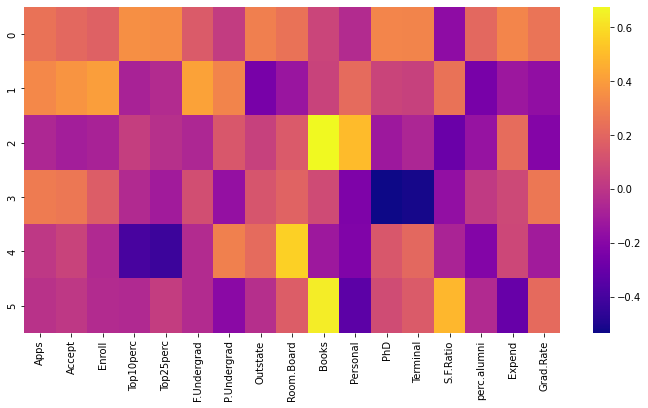

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)